<a href="https://colab.research.google.com/github/aoudjit/aoudjit/blob/main/ET5003_Etivity2_Aziz_AOUDJIT_20201281.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [ ]:
#@title Current Date
Today = '2021-09-24' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20201281" #@param {type:"string"}
Student_full_name = "Aziz AOUDJIT" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [2]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
from sklearn.preprocessing import StandardScaler

In [4]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [5]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

In [99]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary


### Train dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
# training dataset: 
training_file = '/content/drive/MyDrive/university/modules/ET5003/week3/'+'house_train.csv'
dftrain=pd.read_csv(training_file)
# test dataset: 
testing_file = '/content/drive/MyDrive/university/modules/ET5003/week3/'+'house_test.csv'
dftest=pd.read_csv(testing_file)
# cost dataset: 
cost_file = '/content/drive/MyDrive/university/modules/ET5003/week3/'+'true_price.csv'
dfcost=pd.read_csv(cost_file)

In [70]:
# show first data frame rows 
dftrain.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [71]:
# Generate descriptive statistics
dftrain.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


### Test dataset

In [72]:
# show first data frame rows 
dftest.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
0,12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
1,12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
2,12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0
3,12420093,Lucan,4.0,3.0,A3,Dublin,"REA McDonald, Lucan' s longest established est...",prod,NaN,A-rated home within a short walk of Lucan Vill...,53.354402,-6.458647,NaN,sale,semi-detached,132.4
4,12417338,Clondalkin,1.0,3.0,E2,Dublin,"Hibernian Auctioneers are delighted to bring, ...",prod,"Parking,Gas Fired Central Heating,Wired for Ca...",Mature Location \nGas Heating \nClose to Ameni...,53.336530,-6.393587,NaN,sale,semi-detached,88.0


In [73]:
# Generate descriptive statistics
dftest.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120


In [74]:
# Generate descriptive statistics
dfcost.describe()

,Id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


## feature selection


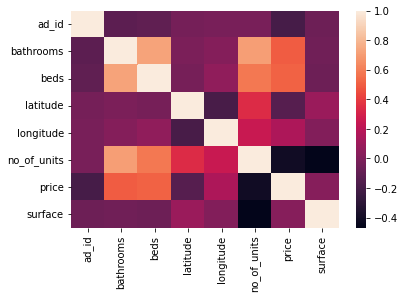

In [75]:
import seaborn as sns
sns.heatmap(dftrain.corr())

ad_id is the id of the property can be discarded, no_of_units vs price has a negative value in term of correlation, so this feature can be discarded, will examine the remaining features bathrooms, beds, latitude, longitude, and price is considered as target feature. will plot all features wil as pairs to check the correlation between all the remaining features, will use pairplot for this purpose, it interresting tool to view the correlation between the features pair by pair

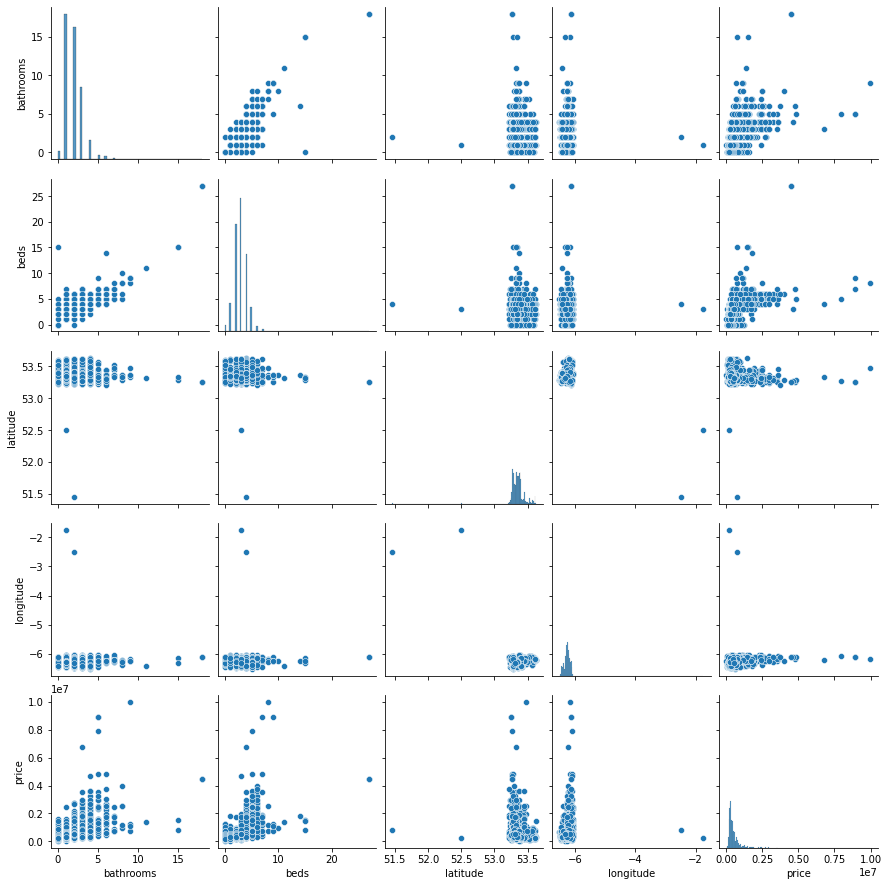

In [76]:
sns.pairplot(data=dftrain[['bathrooms','beds','latitude', 'longitude', 'price']].dropna())
plt.show()

as the pairplot shows there is correlation between all the features with price.

check the data : check the missing values and remove all rows containing missing data

In [77]:
dftrain.isna().sum()

ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

ber_classification, surface, facility and no_of_units has a huge number of missing values, will drop those 2 features
price is target feature so no need to check it
description_block and feature are not significant for our model since it just the description of the property and doesnt impact the price of the property
as stated before ad_idf is just the id of the property as sequential number doesnt have any impact on the price so will remove this column



In [78]:
dftrain = dftrain.drop([ 
                    'ber_classification',
                    'facility',
                    'no_of_units',
                    'surface',
                    'description_block',
                    'features'], axis=1)

remove now the missing value definitively and show again the dftrain data

In [79]:
dftrain = dftrain.dropna()
dftrain.head()

,ad_id,area,bathrooms,beds,county,environment,latitude,longitude,price,property_category,property_type
15,9124101,Clonee,3.0,5.0,Dublin,prod,53.400454,-6.445730,935000.0,new_development_parent,detached
26,9135354,Clondalkin,4.0,4.0,Dublin,prod,53.316410,-6.385214,485000.0,new_development_parent,semi-detached
27,9135646,Clonee,3.0,5.0,Dublin,prod,53.401414,-6.446634,935000.0,new_development_parent,detached
35,9150119,Howth,5.0,5.0,Dublin,prod,53.375377,-6.056749,1475000.0,new_development_parent,detached
38,9150125,Castleknock,2.0,2.0,Dublin,prod,53.372130,-6.338466,410000.0,new_development_parent,apartment


check if there are feature to encode and check the possible values of each features

In [80]:
nb_features=['area',	'bathrooms'	,'beds',	'county',	'environment',	'latitude',	'longitude',	'property_category',	'property_type']
for i in range(len(nb_features)):
    feature = dftrain[nb_features[i]].unique()
    print(nb_features[i],'->', feature, '\n')

area -> ['Clonee' 'Clondalkin' 'Howth' 'Castleknock' 'Malahide' 'Rathfarnham'
 'Lucan' 'Carrickmines' 'Rathmichael' 'Loughshinny' 'Foxrock' 'Finglas'
 'Balbriggan' 'Dublin 1' 'Ballsbridge' 'Sandycove' 'Dalkey' 'Dublin 8'
 'Skerries' 'Booterstown' 'Ballymun' 'Navan Road (D7)' 'Rush' 'Cabra'
 'Swords' 'Glasnevin' 'Garristown' 'Rialto' 'Drumcondra' 'Donabate'
 'Clontarf' 'Ranelagh' 'Dundrum' 'Donnybrook' 'Dun Laoghaire' 'Santry'
 'Blanchardstown' 'Lusk' 'Sandyford' 'Palmerstown' 'Sandymount' 'Terenure'
 'Dublin 2' 'Killiney' 'Saggart' 'Mulhuddart' 'Portmarnock' 'Cabinteely'
 'Whitehall' 'Walkinstown' 'Christchurch' 'Blackrock' 'Clongriffin'
 'Clonskeagh' 'Shankill' 'Ringsend' 'Churchtown' 'Stepaside' 'Dublin 7'
 'Ballycullen' 'Clonsilla' 'Tyrrelstown' 'Ballybrack' 'Mount Merrion'
 'Rathmines' 'The Ward' 'Kilternan' 'Sutton' "Harold's Cross" 'Glenageary'
 'Clarehall' 'Phibsborough' 'Firhouse' 'Rathgar' 'Portobello' 'Citywest'
 'Baldoyle' 'Killester' 'Monkstown' 'Kilmore' 'Tallaght' 'Ballym

county and environment have only one value, so we will discard it from the model
area is huge picklist datatype, for this model will discard it since it require a complex encoding process and the target of this etivity is piecewise model and not Exploratory data analysis.
property_category  and property_type  will be encoded since it has only few values




we have also some values in the features beds and bathrooms that are not reflecting the type of property , like zero values in both columns and values above 10 , so will remove those values
the plan is :
1. encode trhe two features property_category and property_type
2. remove area, county, environment
3. remove zero values and values upper then 10 for beds and bathrooms features


In [81]:
dftrain = dftrain.drop(['area', 'county','environment'], axis=1)


In [108]:
dftrain = pd.get_dummies(dftrain, columns=['property_category', 'property_type'], drop_first=True)
dftrain.head()

KeyError: ignored

show outliners for longitude and latitude

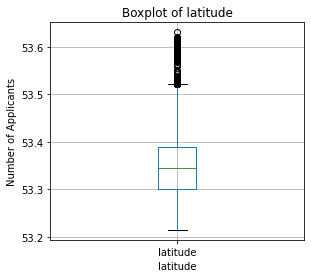

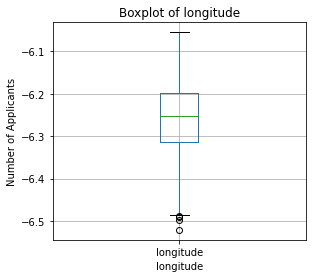

In [206]:
def outliners(feature):
    fig = plt.figure(figsize=(10,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.set_title("Boxplot of " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Number of Applicants')
    dftrain.boxplot(column=[feature])

    plt.show()

outliners('latitude')
outliners('longitude')

In [154]:
dftrain=dftrain[dftrain.bathrooms!=0]
dftrain=dftrain[dftrain.beds!=0]
dftrain=dftrain[dftrain.bathrooms<=10]
dftrain=dftrain[dftrain.beds<=10]
dftrain=dftrain[dftrain.longitude<=-6]
dftrain=dftrain[dftrain.latitude>53]

In [132]:
X = dftrain.loc[:, dftrain.columns != 'price']
y = dftrain['price']
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.35)


Features importance: will use GradientBoostingRegressor from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=feature_importances_#sklearn.ensemble.GradientBoostingRegressor.feature_importances_
to determine the importance of the features we have in the dataset


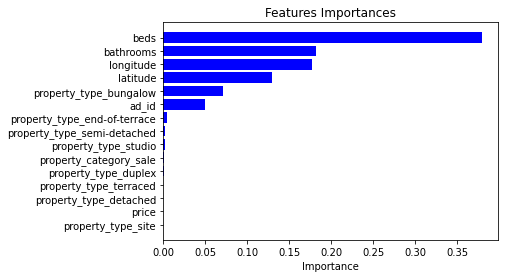

In [213]:

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=1, max_depth=10)
model.fit(X_train, y_train)

indices = np.argsort(importances)
plt.title('Features Importances')
plt.barh(range(len(indices)), model.feature_importances_[indices], color='b')
plt.yticks(range(len(indices)), [dftrain.columns[i] for i in indices])
plt.xlabel('Importance')
plt.show()

as we can see in the above plot . the main importance features are beds, bathrooms, longitude, latitude respectively, so will use in our model those features to build our predictions model.


## Full Model

In [194]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['latitude','longitude','bathrooms','beds','price']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

# this will be used for performance testing of the model, 
featest = ['latitude','longitude','bathrooms','beds']
df_subset_test  =  dftest[featest].dropna(axis=0)

# cost
df_cost = dfcost[dfcost.index.isin(df_subset_test.index)]

In [156]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())
print('Number of nan in df_cost dataset: ',df_cost.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0
Number of nan in df_cost dataset:  0


In [157]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
#Xs_train = X_train
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   
#ys_train = y_train
# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 
#Xs_test = X_test
# test set, output column, cost
y_test = df_cost.Expected.values.reshape(-1,1)
#y_test = y_test

In [158]:
print(Xs_train.shape)
print(ys_train.shape)
print(Xs_test.shape)
print(y_test.shape)

(2820, 4)
(2820, 1)
(500, 4)
(500, 1)


In [159]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float').reshape(-1,1))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [160]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

In [193]:
print(Xss_train)

[[53.40045411 -6.44573026  3.          5.          9.        ]
 [53.31641013 -6.38521365  4.          4.         16.        ]
 [53.40141406 -6.44663439  3.          5.          9.        ]
 ...
 [53.346098   -6.276856    1.          2.          1.        ]
 [53.273518   -6.1785      2.          3.          4.        ]
 [53.310073   -6.325158    2.          3.          4.        ]]


Finished [100%]: Average Loss = 2,657.9


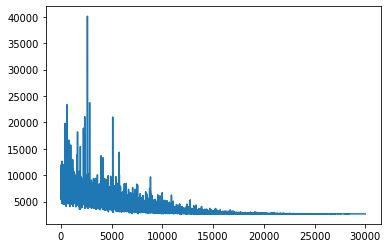

In [203]:
#number of iterations of the algorithms
iter = 30000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [204]:
# samples from the posterior
posterior = approximation.sample(5000)

In [205]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  209841.65762775313
MAPE =  0.2825102310483785


### Full Model PPC

In [164]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

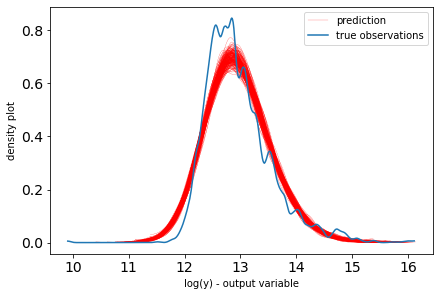

In [165]:
num_samples_ = 200
Ypred = yscaler.inverse_transform(ppc(posterior['alpha'],posterior['beta'],posterior['sigma_n'],Xn_train, nsamples=num_samples_))

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# PIECEWISE REGRESSION

## Clustering

Number of Cluster:

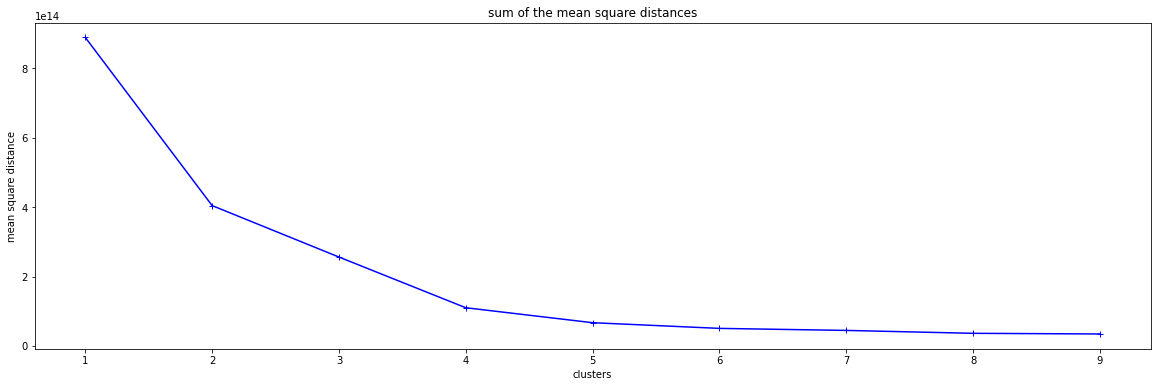

In [229]:
from sklearn.cluster import KMeans

inertia = []
indexes = []
for cls in range(1, 10):
    kmeans = KMeans(init='random', n_clusters=cls, max_iter=500).fit(df_subset_train)
    inertia.append( kmeans.inertia_)
    indexes.append( cls)


plt.figure(figsize=(20, 6))
plt.plot(indexes, inertia, 'b+-')
plt.xlabel("clusters")
plt.ylabel("mean square distance")

plt.title("sum of the mean square distances")
plt.show()

from the k-means algorithm as shown above, we can take elbow point 5 as the number of clusters for this dataset.

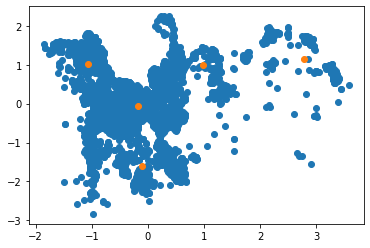

In [192]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
dftrain.head()
gmm = GaussianMixture(n_components=5)
# clustering by features latitude, longitude
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])


In [168]:
np.max(ys_train)

9995000.0

### Clusters

In [169]:
# train clusters

# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 180, 1: 1479, 2: 278, 3: 481, 4: 402}

In [170]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))


{0: 41, 1: 268, 2: 46, 3: 61, 4: 84}

In [171]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [172]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [173]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [174]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [180]:
# cluster 3
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_test[clusters_test==4,:]
ylog4 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

## Piecewise Model

In [175]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])



In [176]:
with model_0:
  # iterations of the algorithm
  approximation = pm.fit(60000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(2500,include_transformed=True)

Finished [100%]: Average Loss = 217.61


In [177]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 1,398.5


In [178]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 266.86


In [179]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 500.24


In [181]:
# model_3
with pm.Model() as model4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn4.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])
    
with model4:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 357.86


##Simulations

In [ ]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

### Only Cluster 0

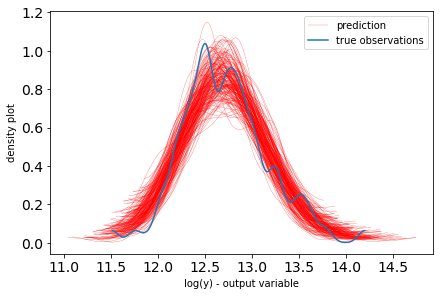

In [231]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=180))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

{0: 180, 1: 1479, 2: 278, 3: 481, 4: 402}

### Only Cluster 1

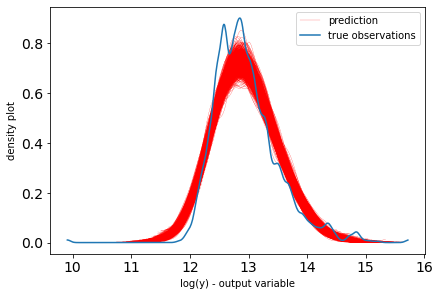

In [232]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=1500))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 2

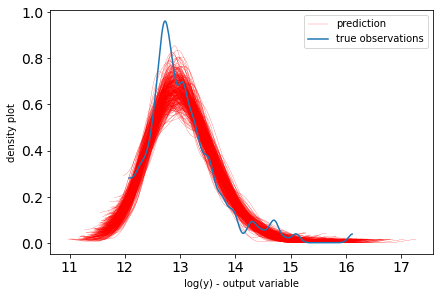

In [233]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=300))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 3

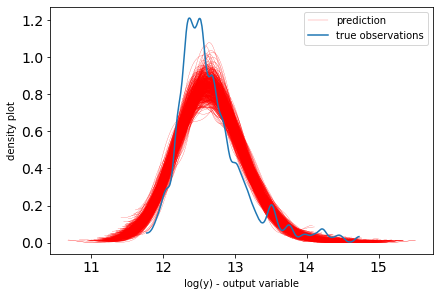

In [234]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=500))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

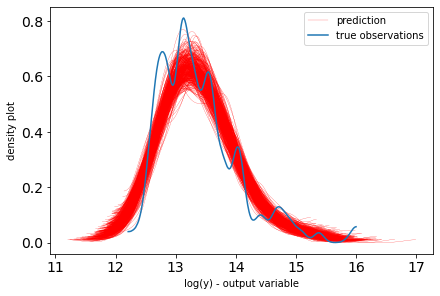

In [235]:
#Simulation
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=400))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

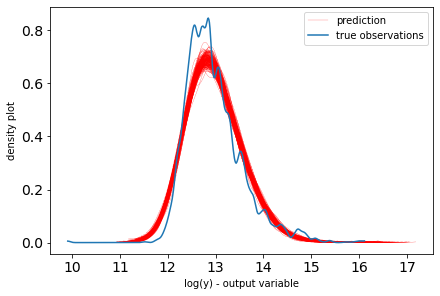

In [236]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),yscaler4.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3,ylog4])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Test set performance

In [237]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]) /y_test[clusters_test==0])))
# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]) /y_test[clusters_test==1])))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]) /y_test[clusters_test==2])))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]) /y_test[clusters_test==3])))

y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("Size Cluster4", np.sum(clusters_test==4), ", MAE Cluster4=",
      (np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]) /y_test[clusters_test==4])))

y_test = df_cost.Expected.values
# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3]),
                 abs(y_pred_BLR4 - y_test[clusters_test==4])])
joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - y_test[clusters_test==0]) /y_test[clusters_test==0],
                        abs(y_pred_BLR1 - y_test[clusters_test==1]) /y_test[clusters_test==1],
                        abs(y_pred_BLR2 - y_test[clusters_test==2]) /y_test[clusters_test==2],
                        abs(y_pred_BLR3 - y_test[clusters_test==3]) /y_test[clusters_test==3],
                        abs(y_pred_BLR4 - y_test[clusters_test==4]) /y_test[clusters_test==4]
                       ]))

# MAE band MAPE
print("MAE=",np.mean(joint),"MAPE=",joint_mape)


Size Cluster0 41 , MAE Cluster0= 83016.87734498516
MAPE =  0.2274670609411687
Size Cluster1 268 , MAE Cluster1= 219368.525644493
MAPE =  0.2656315325267599
Size Cluster2 46 , MAE Cluster2= 158808.6244512349
MAPE =  0.25158575793673943
Size Cluster3 61 , MAE Cluster3= 117307.58331037004
MAPE =  0.22815802360709184
Size Cluster4 84 , MAE Cluster4= 248999.96721906005
MAPE =  0.24291760760608677
MAE= 195142.82679391786 MAPE= 0.25282212711958696


### PPC on the Test set



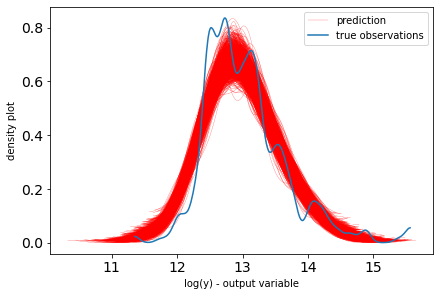

In [238]:
num_samples2 = 1500
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xtestn4, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# SUMMARY